# Predict Future Sales
This challenge serves as final project for the "How to win a data science competition" Coursera course.

In this competition you will work with a challenging time-series dataset consisting of daily sales data, kindly provided by one of the largest Russian software firms - 1C Company. 

We are asking you to predict total sales for every product and store in the next month. By solving this competition you will be able to apply and enhance your data science skills.

2013년 1월부터 2015년 10월까지의 물품 정보 및 판매량이 훈련세트로 주어지며, 테스트 데이터는 2015년 11월의 데이터로, 11월의 물품 판매량을 맞추는 것이 목표다.

## * Data
### File descriptions
1. sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
2. test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
3. sample_submission.csv - a sample submission file in the correct format.
4. items.csv - supplemental information about the items/products.
5. item_categories.csv - supplemental information about the items categories.
6. shops.csv - supplemental information about the shops.

### Data fields

1. ID - an Id that represents a (Shop, Item) tuple within the test set
2. shop_id - unique identifier of a shop
3. item_id - unique identifier of a product
4. item_category_id - unique identifier of item category
5. item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
6. item_price - current price of an item
7. date - date in format dd/mm/yyyy
8. date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
9. item_name - name of item
10. shop_name - name of shop
11. item_category_name - name of item category

### 데이터 필드

1. train.csv  - 2013년 1월부터 2015년 10월 까지의 date, ,date_block_num, Shop_id, item_id, item_price, item_cnt_dat(해당 날에 그 물품이 얼마나 팔렸는가의 카운트, 정답 레이블)
2. test.csv - 2015년 11월의 Shop_id, item_id가 주어진다.
3. items.csv - 상품의 이름과 Category_id가 주어진다.
4. item_categories.csv - Category_id와 상품 카테고리가 주어진다.
5. shops.csv - 상점의 이름과 shop_id가 주어진다.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv
/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv


* ##  Data overview and check

In [2]:
train = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv")
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
test = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/test.csv")
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [4]:
shop = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/shops.csv")
shop

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [5]:
item = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/items.csv")
item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
item_category = pd.read_csv("/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv")
item_category.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


* ##  Preliminary Wrangling
### Check nan data

In [8]:
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [9]:
test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

### Check duplicated data

In [10]:
train.duplicated().sum()

6

In [11]:
train[train.duplicated() == True]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


In [12]:
train.drop_duplicates(inplace=True)

In [13]:
train.duplicated().sum()

0

### Check Outlier data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

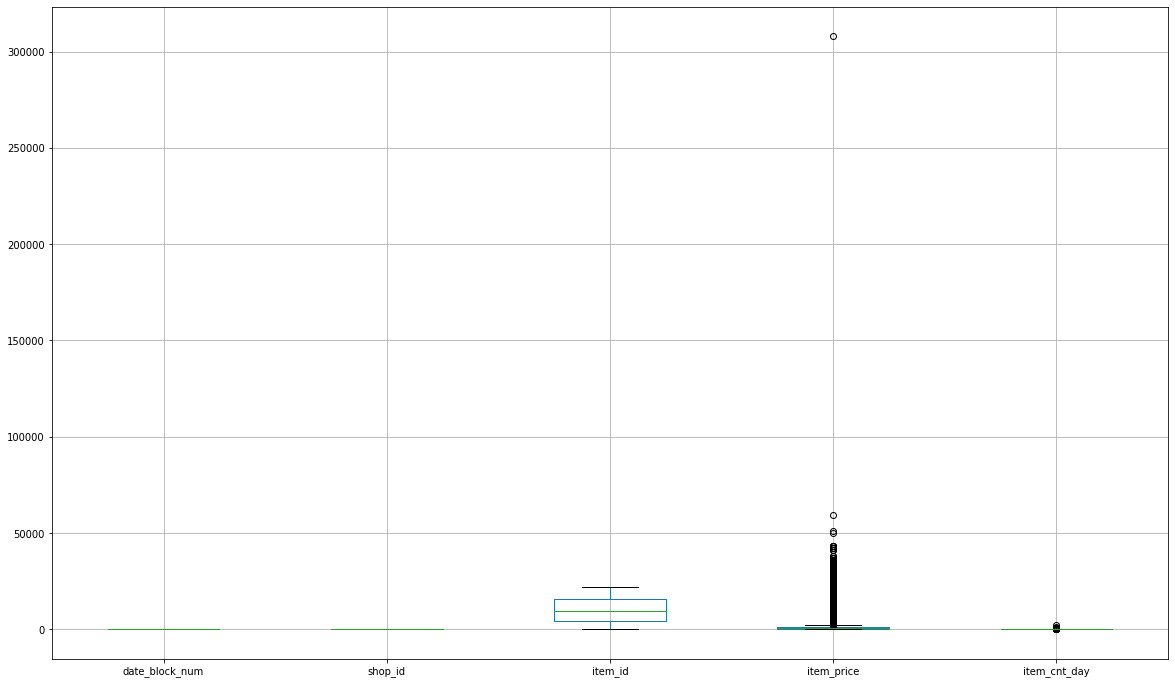

In [15]:
plt.figure(figsize=(20,12))
train.boxplot()

두개의 아웃라이어가 보인다.

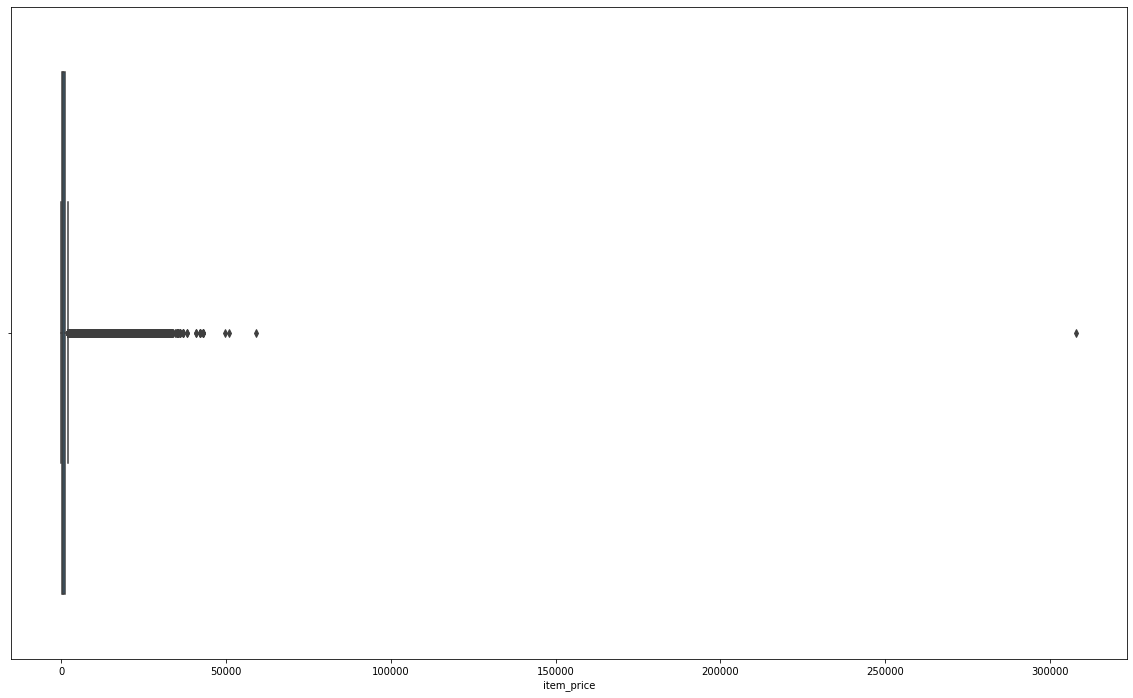

In [16]:
plt.figure(figsize=(20,12))
sns.boxplot(x='item_price',data=train)

비정상적으로 높은 item_price 값 존재

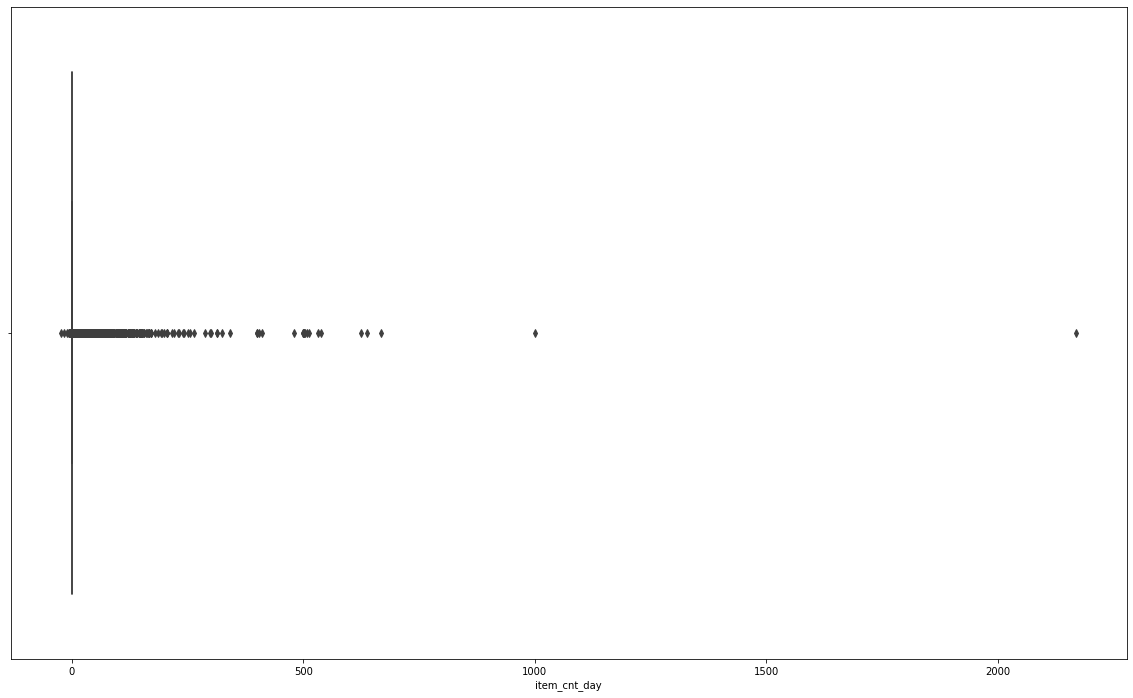

In [17]:
plt.figure(figsize=(20,12))
sns.boxplot(x='item_cnt_day',data=train)

판매량인데 0이하, 즉 마이너스 데이터가 존재

In [18]:
train = train[(train.item_price < 50000)&(train.item_price >= 0)]
train = train[(train.item_cnt_day < 1000)&(train.item_cnt_day >= 0)]

비정상적으로 높은 데이터와 0이하의 데이터를 제거

In [19]:
train.shape

(2928481, 6)

In [20]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.928481e+06,2.928481e+06,2.928481e+06,2.928481e+06,2.928481e+06
mean,1.456976e+01,3.300297e+01,1.020028e+04,8.893257e+02,1.247257e+00
std,9.422955e+00,1.622543e+01,6.324393e+03,1.717568e+03,2.217430e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.477000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.355000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.569100e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,4.978200e+04,6.690000e+02


* ## Data Preprocessing
### Shop 전처리

In [21]:
shop

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


shop_name의 패턴을 조사하니 도시, 쇼핑센터별 코드, 상점이름이 공백으로 구분되어 있다.

In [22]:
shop.loc[shop.shop_name == 'Сергиев Посад ТЦ "7Я"','shop_name'] = 'СергиевПосад ТЦ "7Я"'

도시 이름이 띄어져있어 이어준다.

In [23]:
shop['city'] = shop['shop_name'].str.split(" ").map(lambda x: x[0])

In [24]:
shop.head()

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [25]:
shop.loc[shop.city == '!Якутск','city'] = 'Якутск'

특수문자가 씌워진 도시명을 올바르게 변환한다.

In [26]:
shop["city"].value_counts()

Москва              13
Якутск               4
РостовНаДону         3
Тюмень               3
Воронеж              3
Жуковский            2
СПб                  2
Н.Новгород           2
Казань               2
Самара               2
Красноярск           2
Уфа                  2
Новосибирск          2
Калуга               1
Цифровой             1
Балашиха             1
Коломна              1
Вологда              1
Адыгея               1
Ярославль            1
Мытищи               1
Сургут               1
Химки                1
Омск                 1
Томск                1
Курск                1
Чехов                1
Выездная             1
СергиевПосад         1
Волжский             1
Интернет-магазин     1
Name: city, dtype: int64

In [27]:
shop['types'] = shop['shop_name'].str.split(" ").map(lambda x: x[1])

쇼핑센터코드 분류

In [28]:
shop["types"].value_counts()

ТЦ                28
ТРЦ               11
ТК                 5
ТРК                5
Орджоникидзе,      2
ул.                2
ЧС                 1
"Распродажа"       1
МТРЦ               1
Торговля           1
(Плехановская,     1
Магазин            1
склад              1
Name: types, dtype: int64

In [29]:
types = []
for ty in shop.types.unique():
    if len(shop[shop.types == ty]) >4:
        types.append(ty)

In [30]:
shop["types"] = shop["types"].apply(lambda x: x if (x in types) else 'etc')

카테고리의 카운트가 4개 이하인 것들은 etc(등)으로 분류

In [31]:
train.loc[train.shop_id == 0, "shop_id"] = 57
test.loc[test.shop_id == 0 , "shop_id"] = 57
train.loc[train.shop_id == 1, "shop_id"] = 58
test.loc[test.shop_id == 1 , "shop_id"] = 58
train.loc[train.shop_id == 11, "shop_id"] = 10
test.loc[test.shop_id == 11, "shop_id"] = 10
train.loc[train.shop_id == 40, "shop_id"] = 39
test.loc[test.shop_id == 40, "shop_id"] = 39

훈련세트와 테스트세트의 잘못된 샵 코드 수정

In [32]:
from sklearn.preprocessing import LabelEncoder
shop["city_code"] = LabelEncoder().fit_transform(shop.city)
shop["type_code"] = LabelEncoder().fit_transform(shop.types)

In [33]:
shop = shop.drop(["shop_name","city","types"],axis=1)

라벨 인코딩 후 Object(문자열) 칼럼들 제거

In [34]:
shop

,shop_id,city_code,type_code
0,0,29,0
1,1,29,4
2,2,0,4
3,3,1,2
4,4,2,4
5,5,3,3
6,6,4,0
7,7,4,3
8,8,4,3
9,9,5,0


### Item_category 전처리

In [35]:
item_category

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


아이템 카테고리의 구조는 카테고리1 - 카테고리2로 이루어져있다. 따라서 공백으로 카테고리1,2를 추출한다.

In [36]:
item_category['kind'] = item_category['item_category_name'].str.split(" ").map(lambda x: x[0])

In [37]:
item_category["kind"].value_counts()

Игры          14
Книги         13
Подарки       12
Игровые        8
Аксессуары     7
Программы      6
Музыка         6
Карты          5
Кино           5
Служебные      2
Чистые         2
Билеты         1
PC             1
Доставка       1
Элементы       1
Name: kind, dtype: int64

In [38]:
kind = []
for kd in item_category.kind.unique():
    if len(item_category[item_category.kind == kd]) >4:
        kind.append(kd)

In [39]:
item_category["kind"] = item_category["kind"].apply(lambda x: x if (x in kind) else 'etc')

In [40]:
item_category["kind"].value_counts()

Игры          14
Книги         13
Подарки       12
etc            8
Игровые        8
Аксессуары     7
Музыка         6
Программы      6
Кино           5
Карты          5
Name: kind, dtype: int64

카테고리1의 카운트가 4개 이하인 것들은 etc로 분류

In [41]:
item_category["split"] = item_category.item_category_name.apply(lambda x: x.split("-"))

In [42]:
item_category["subkind"] = item_category.split.apply(lambda x: x[1].strip() if len(x) > 1 else x[0].strip())

In [43]:
from sklearn.preprocessing import LabelEncoder
item_category["kind_code"] = LabelEncoder().fit_transform(item_category["kind"])
item_category["subkind_code"] = LabelEncoder().fit_transform(item_category["subkind"])

In [44]:
item_category = item_category[["item_category_id","kind_code","subkind_code"]]

카테고리 1,2를 라벨인코딩 후 오브젝트 문자열 칼럼을 제거

In [45]:
item_category

,item_category_id,kind_code,subkind_code
0,0,0,29
1,1,1,9
2,2,1,10
3,3,1,11
4,4,1,13
...,...,...,...
79,79,0,54
80,80,0,25
81,81,0,62
82,82,0,63


### Item 전처리

In [46]:
item

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [47]:
item.drop(['item_name'],axis=1,inplace=True)

상품의 이름에서도 어느정도 판매량에 관련된 데이터를 추출할 수 있을것 같지만 전처리가 복잡하여 생략

* ## Feature Engineering
### Making Matrix for date_block_num, shop_id, item_id

In [48]:
import time
import itertools

In [49]:
ts = time.time()
matrix = []
cols = ['date_block_num', 'shop_id', 'item_id']
for i in range(34):
    sales = train[train.date_block_num == i]
    matrix.append(np.array(list(itertools.product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype='int16'))
matrix = pd.DataFrame(np.vstack(matrix), columns=cols)
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.sort_values(cols, inplace=True)
time.time()-ts

21.2511088848114

예측하려는 테스트세트는 월, 상점, 상품으로 이루어진 데이터임으로 모든 경우의 (0-34)월, 상점, 상품의 조합을 고려한 데이터프레임 생성

(itertools.product를 이용한 곱집합)

In [50]:
matrix.head()

,date_block_num,shop_id,item_id
114838,0,2,19
117076,0,2,27
120551,0,2,28
118242,0,2,29
114531,0,2,32


### item_cnt_month

In [51]:
ts = time.time()
group = train.groupby( ["date_block_num", "shop_id", "item_id"] ).agg( {"item_cnt_day": ["sum"]} )
group.columns = ["item_cnt_month"]
group.reset_index( inplace = True)
matrix = pd.merge( matrix, group, on = cols, how = "left" )
matrix["item_cnt_month"] = matrix["item_cnt_month"].fillna(0).clip(0,20).astype(np.float16)
time.time() - ts

6.083090543746948

groupby.agg 를 사용하여 date_block_num, shop_id, item_id별 하루 판매량에 합계를 적용하여 월별 판매량 칼럼 생성

nan값은 0으로 채우고 이상치에 robust하기 위해 범위를 0부터 20 사이로 제한.

In [52]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,2,19,0.0
1,0,2,27,1.0
2,0,2,28,0.0
3,0,2,29,0.0
4,0,2,32,0.0


### Merge test data

In [53]:
test["date_block_num"] = 34
test["date_block_num"] = test["date_block_num"].astype(np.int8)
test["shop_id"] = test.shop_id.astype(np.int8)
test["item_id"] = test.item_id.astype(np.int16)

In [54]:
ts = time.time()

matrix = pd.concat([matrix, test.drop(["ID"],axis = 1)], ignore_index=True, sort=False, keys=cols)
matrix.fillna( 0, inplace = True )
time.time() - ts

0.09007978439331055

In [55]:
matrix.tail()

,date_block_num,shop_id,item_id,item_cnt_month
11026963,34,45,18454,0.0
11026964,34,45,16188,0.0
11026965,34,45,15757,0.0
11026966,34,45,19648,0.0
11026967,34,45,969,0.0


테스트 데이터의 date_block_num을 33개월 이후인 34로 설정하고 Matrix에 test 데이터를 합친다.

### Merge shop, item, item_category data

In [56]:
matrix = pd.merge( matrix, shop, on = ["shop_id"], how = "left" )
matrix = pd.merge(matrix, item, on = ["item_id"], how = "left")
matrix = pd.merge( matrix, item_category, on = ["item_category_id"], how = "left" )
matrix["city_code"] = matrix["city_code"].astype(np.int8)
matrix["type_code"] = matrix["type_code"].astype(np.int8)
matrix["item_category_id"] = matrix["item_category_id"].astype(np.int8)
matrix["subkind_code"] = matrix["subkind_code"].astype(np.int8)
matrix["kind_code"] = matrix["kind_code"].astype(np.int8)

In [57]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month,city_code,type_code,item_category_id,kind_code,subkind_code
0,0,2,19,0.0,0,4,40,5,4
1,0,2,27,1.0,0,4,19,3,10
2,0,2,28,0.0,0,4,30,3,55
3,0,2,29,0.0,0,4,23,3,16
4,0,2,32,0.0,0,4,40,5,4


### Target lags

A lag features is a fancy name for a variable which contains data from prior time steps. If we have time-series data, we can convert it into rows. Every row contains data about one observation and includes all previous occurrences of that observation.

34달째의 판매랑을 예측하기 위해서 이전 달의 여러 값(Lag)들을 특성으로 추가하면 정확도가 올라갈 것이다. 이를 Lag Feature라 한다.  

In [58]:
def lag_feature( df,lags, cols ):
    for col in cols:
        print(col)
        tmp = df[["date_block_num", "shop_id","item_id",col ]]
        for i in lags:
            shifted = tmp.copy()
            shifted.columns = ["date_block_num", "shop_id", "item_id", col + "_lag_"+str(i)]
            shifted.date_block_num = shifted.date_block_num + i
            df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df

In [59]:
ts = time.time()

matrix = lag_feature( matrix, [1,2,3], ["item_cnt_month"] )
time.time() - ts

item_cnt_month


22.618515729904175

1, 2, 3달 전의 월별 판매량을 특성으로 추가

In [60]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month,city_code,type_code,item_category_id,kind_code,subkind_code,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3
0,0,2,19,0.0,0,4,40,5,4,NaN,NaN,NaN
1,0,2,27,1.0,0,4,19,3,10,NaN,NaN,NaN
2,0,2,28,0.0,0,4,30,3,55,NaN,NaN,NaN
3,0,2,29,0.0,0,4,23,3,16,NaN,NaN,NaN
4,0,2,32,0.0,0,4,40,5,4,NaN,NaN,NaN


### Mean encoded feature

label encoding과 one hot encoding의 값이 구분만 하는 것에 의미가 있다면
Mean encoding은 구분을 넘어 Feature와 Target의 수치적인 관계를 나타내어 차원의 저주 해결과 동시에 Less bias를 가져 예측 정확도를 높임

In [61]:
#1달 전의 상품들이 팔린 월별 평균 갯수
ts = time.time()
group = matrix.groupby( ["date_block_num"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_avg_item_cnt"]
group.reset_index(inplace = True)

matrix = pd.merge(matrix, group, on = ["date_block_num"], how = "left")
matrix.date_avg_item_cnt = matrix["date_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1], ["date_avg_item_cnt"] )
matrix.drop( ["date_avg_item_cnt"], axis = 1, inplace = True )
time.time() - ts

date_avg_item_cnt


11.48335886001587

In [62]:
#1,2,3 달 전의 상품들이 팔린 월, 상품별 평균 갯수
ts = time.time()
group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
matrix.date_item_avg_item_cnt = matrix['date_item_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3], ['date_item_avg_item_cnt'])
matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

date_item_avg_item_cnt


28.229559421539307

In [63]:
#1,2,3 달 전의 상품들이 팔린 월, 상점별 평균 갯수
ts = time.time()
group = matrix.groupby( ["date_block_num","shop_id"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_shop_avg_item_cnt"]
group.reset_index(inplace = True)

matrix = pd.merge(matrix, group, on = ["date_block_num","shop_id"], how = "left")
matrix.date_avg_item_cnt = matrix["date_shop_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1,2,3], ["date_shop_avg_item_cnt"] )
matrix.drop( ["date_shop_avg_item_cnt"], axis = 1, inplace = True )
time.time() - ts

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


date_shop_avg_item_cnt


29.042465925216675

In [64]:
#1,2,3 달 전의 상품들이 팔린 월, 상점, 상품별 평균 갯수
ts = time.time()
group = matrix.groupby( ["date_block_num","shop_id","item_id"] ).agg({"item_cnt_month" : ["mean"]})
group.columns = ["date_shop_item_avg_item_cnt"]
group.reset_index(inplace = True)

matrix = pd.merge(matrix, group, on = ["date_block_num","shop_id","item_id"], how = "left")
matrix.date_avg_item_cnt = matrix["date_shop_item_avg_item_cnt"].astype(np.float16)
matrix = lag_feature( matrix, [1,2,3], ["date_shop_item_avg_item_cnt"] )
matrix.drop( ["date_shop_item_avg_item_cnt"], axis = 1, inplace = True )
time.time() - ts

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


date_shop_item_avg_item_cnt


41.067551612854004

In [65]:
#1달 전의 상품들이 팔린 월, 상점, 카테고리2별 평균 갯수
ts = time.time()
group = matrix.groupby(['date_block_num', 'shop_id', 'subkind_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_subkind_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'subkind_code'], how='left')
matrix.date_shop_subtype_avg_item_cnt = matrix['date_shop_subkind_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_shop_subkind_avg_item_cnt'])
matrix.drop(['date_shop_subkind_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


date_shop_subkind_avg_item_cnt


14.775907754898071

In [66]:
#1달 전의 상품들이 팔린 월, 도시별 평균 갯수
ts = time.time()
group = matrix.groupby(['date_block_num', 'city_code']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_city_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', "city_code"], how='left')
matrix.date_city_avg_item_cnt = matrix['date_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_city_avg_item_cnt'])
matrix.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts


date_city_avg_item_cnt


14.377831935882568

In [67]:
#1달 전의 상품들이 팔린 월, 상품, 도시별 평균 갯수
ts = time.time()
group = matrix.groupby(['date_block_num', 'item_id', 'city_code']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id', 'city_code'], how='left')
matrix.date_item_city_avg_item_cnt = matrix['date_item_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_item_city_avg_item_cnt'])
matrix.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

date_item_city_avg_item_cnt


23.473470211029053

In [68]:
#1달 전의 상품들이 팔린 월, 상점, 카테고리1별 평균 갯수
ts = time.time()
group = matrix.groupby(['date_block_num', 'shop_id', 'item_category_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_shop_cat_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')
matrix.date_shop_cat_avg_item_cnt = matrix['date_shop_cat_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], ['date_shop_cat_avg_item_cnt'])
matrix.drop(['date_shop_cat_avg_item_cnt'], axis=1, inplace=True)
time.time() - ts

date_shop_cat_avg_item_cnt


15.681505680084229

In [69]:
matrix.tail()

,date_block_num,shop_id,item_id,item_cnt_month,city_code,type_code,item_category_id,kind_code,subkind_code,item_cnt_month_lag_1,...,date_shop_avg_item_cnt_lag_1,date_shop_avg_item_cnt_lag_2,date_shop_avg_item_cnt_lag_3,date_shop_item_avg_item_cnt_lag_1,date_shop_item_avg_item_cnt_lag_2,date_shop_item_avg_item_cnt_lag_3,date_shop_subkind_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_1
11026963,34,45,18454,0.0,20,4,55,7,2,1.0,...,0.126831,0.129395,0.139282,1.0,0.0,0.0,0.126831,0.135498,0.5,0.126831
11026964,34,45,16188,0.0,20,4,64,8,42,0.0,...,0.126831,0.129395,NaN,0.0,0.0,NaN,0.094482,0.135498,0.0,0.094482
11026965,34,45,15757,0.0,20,4,55,7,2,0.0,...,0.126831,0.129395,0.139282,0.0,0.0,0.0,0.126831,0.135498,0.0,0.126831
11026966,34,45,19648,0.0,20,4,40,5,4,0.0,...,0.126831,0.129395,0.139282,0.0,0.0,0.0,0.083740,0.135498,0.0,0.083740
11026967,34,45,969,0.0,20,4,37,5,1,0.0,...,0.126831,0.129395,0.139282,0.0,0.0,0.0,0.126343,0.135498,0.5,0.128174


각 Feature의 조합은 도메인 지식, 모델의 feature_importance를 평가해서 만듦.

### Trend feature

Trend feature는 현재 달을 기준으로 지난 달의 feature들의 값이 전체 평균보다 높은지 낮은지를 나타냄.

### Price trend / 가격 트렌드

In [70]:
ts = time.time()

# 모든 월에 대해 각 상품의 평균 가격
group = train.groupby( ["item_id"] ).agg({"item_price": ["mean"]})
group.columns = ["item_avg_item_price"]
group.reset_index(inplace = True)

matrix = matrix.merge( group, on = ["item_id"], how = "left" )
matrix["item_avg_item_price"] = matrix.item_avg_item_price.astype(np.float16)

# 월, 상품별 평균 가격
group = train.groupby( ["date_block_num","item_id"] ).agg( {"item_price": ["mean"]} )
group.columns = ["date_item_avg_item_price"]
group.reset_index(inplace = True)

matrix = matrix.merge(group, on = ["date_block_num","item_id"], how = "left")
matrix["date_item_avg_item_price"] = matrix.date_item_avg_item_price.astype(np.float16)

# 1,2,3달 전의 월, 상품별 평균 가격
lags = [1, 2, 3]
matrix = lag_feature( matrix, lags, ["date_item_avg_item_price"] )

#모든 월의 가격 평균하고 1-3달 가격을 비교하여 지난 달의 가격 트렌드 추가
for i in lags:
    matrix["delta_price_lag_" + str(i) ] = (matrix["date_item_avg_item_price_lag_" + str(i)]- matrix["item_avg_item_price"] )/ matrix["item_avg_item_price"]

#지난 달에 팔린 물량이 없을 경우 다른 달에서 트렌드를 찾는 함수
def select_trends(row) :
    for i in lags:
        if row["delta_price_lag_" + str(i)]:
            return row["delta_price_lag_" + str(i)]
    return 0


matrix["delta_price_lag"] = matrix.apply(select_trends, axis = 1)
matrix["delta_price_lag"] = matrix.delta_price_lag.astype( np.float16 )
matrix["delta_price_lag"].fillna( 0 ,inplace = True)

#가장 최근 트렌드 가격을 찾은 후 필요없는 칼럼 제거
features_to_drop = ["item_avg_item_price", "date_item_avg_item_price"]
for i in lags:
    features_to_drop.append("date_item_avg_item_price_lag_" + str(i) )
    features_to_drop.append("delta_price_lag_" + str(i) )
matrix.drop(features_to_drop, axis = 1, inplace = True)
time.time() - ts


date_item_avg_item_price


509.4343285560608

### Revenue trend / 매출 트렌드

In [71]:
train['revenue'] = train['item_price'] * train['item_cnt_day']

In [72]:
ts = time.time()

# 월, 상점별 매출 합계
group = train.groupby( ["date_block_num","shop_id"] ).agg({"revenue": ["sum"] })
group.columns = ["date_shop_revenue"]
group.reset_index(inplace = True)

matrix = matrix.merge( group , on = ["date_block_num", "shop_id"], how = "left" )
matrix['date_shop_revenue'] = matrix['date_shop_revenue'].astype(np.float32)

# 모든 월에 대한 각 상점의 매출 평균
group = group.groupby(["shop_id"]).agg({ "date_block_num":["mean"] })
group.columns = ["shop_avg_revenue"]
group.reset_index(inplace = True )

matrix = matrix.merge( group, on = ["shop_id"], how = "left" )
matrix["shop_avg_revenue"] = matrix.shop_avg_revenue.astype(np.float32)

# 상점의 월평균 매출 - 전기간 평균매출
matrix["delta_revenue"] = (matrix['date_shop_revenue'] - matrix['shop_avg_revenue']) / matrix['shop_avg_revenue']
matrix["delta_revenue"] = matrix["delta_revenue"]. astype(np.float32)

#가장 최근 한 달전만의 총 매출만 사용
matrix = lag_feature(matrix, [1], ["delta_revenue"])
matrix["delta_revenue_lag_1"] = matrix["delta_revenue_lag_1"].astype(np.float32)
matrix.drop( ["date_shop_revenue", "shop_avg_revenue", "delta_revenue"] ,axis = 1, inplace = True)
time.time() - ts

delta_revenue


17.43459415435791

In [73]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month,city_code,type_code,item_category_id,kind_code,subkind_code,item_cnt_month_lag_1,...,date_shop_avg_item_cnt_lag_3,date_shop_item_avg_item_cnt_lag_1,date_shop_item_avg_item_cnt_lag_2,date_shop_item_avg_item_cnt_lag_3,date_shop_subkind_avg_item_cnt_lag_1,date_city_avg_item_cnt_lag_1,date_item_city_avg_item_cnt_lag_1,date_shop_cat_avg_item_cnt_lag_1,delta_price_lag,delta_revenue_lag_1
0,0,2,19,0.0,0,4,40,5,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
1,0,2,27,1.0,0,4,19,3,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2,0,2,28,0.0,0,4,30,3,55,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
3,0,2,29,0.0,0,4,23,3,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
4,0,2,32,0.0,0,4,40,5,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11026963,34,45,18454,0.0,20,4,55,7,2,1.0,...,0.139282,1.0,0.0,0.0,0.126831,0.135498,0.5,0.126831,-0.475098,51790.574219
11026964,34,45,16188,0.0,20,4,64,8,42,0.0,...,NaN,0.0,0.0,NaN,0.094482,0.135498,0.0,0.094482,0.081116,51790.574219
11026965,34,45,15757,0.0,20,4,55,7,2,0.0,...,0.139282,0.0,0.0,0.0,0.126831,0.135498,0.0,0.126831,0.155884,51790.574219
11026966,34,45,19648,0.0,20,4,40,5,4,0.0,...,0.139282,0.0,0.0,0.0,0.083740,0.135498,0.0,0.083740,-0.091736,51790.574219


### Other Feature

In [74]:
matrix["month"] = matrix["date_block_num"] % 12
days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])

In [75]:
matrix["days"] = matrix["month"].map(days).astype(np.int8)

월, 일 추가

In [76]:
ts = time.time()
matrix["item_shop_first_sale"] = matrix["date_block_num"] - matrix.groupby(["item_id","shop_id"])["date_block_num"].transform('min')
matrix["item_first_sale"] = matrix["date_block_num"] - matrix.groupby(["item_id"])["date_block_num"].transform('min')
time.time() - ts

1.9524967670440674

상점, 상품별 최초 판매 이후 개월

상품별 최초 판매 이후 개월

In [77]:
ts = time.time()
matrix = matrix[matrix["date_block_num"] > 3]
time.time() - ts

1.122464895248413

Lag feature와 Trend feature는 1,2,3달 전의 데이터를 포함하므로 처음 0,1,2,3 개월째의 데이터는 정상적인 값이 나오지 않으므로 제거 

In [78]:
ts = time.time()
def fill_na(df):
    for col in df.columns:
        if ('_lag_' in col) & (df[col].isnull().any()):
            if ('item_cnt' in col):
                df[col].fillna(0, inplace=True)         
    return df

matrix = fill_na(matrix)
time.time() - ts

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


2.5010480880737305

결측치 0으로 처리

* ## Modeling

In [79]:
matrix.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'city_code',
       'type_code', 'item_category_id', 'kind_code', 'subkind_code',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'date_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_1',
       'date_item_avg_item_cnt_lag_2', 'date_item_avg_item_cnt_lag_3',
       'date_shop_avg_item_cnt_lag_1', 'date_shop_avg_item_cnt_lag_2',
       'date_shop_avg_item_cnt_lag_3', 'date_shop_item_avg_item_cnt_lag_1',
       'date_shop_item_avg_item_cnt_lag_2',
       'date_shop_item_avg_item_cnt_lag_3',
       'date_shop_subkind_avg_item_cnt_lag_1', 'date_city_avg_item_cnt_lag_1',
       'date_item_city_avg_item_cnt_lag_1', 'date_shop_cat_avg_item_cnt_lag_1',
       'delta_price_lag', 'delta_revenue_lag_1', 'month', 'days',
       'item_shop_first_sale', 'item_first_sale'],
      dtype='object')

### Saving data and Cleaning ram

In [80]:
import os
import gc
import pickle
from xgboost import XGBRegressor
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [81]:
matrix.to_pickle('data.pkl')
del matrix
del group
del item
del shop
del item_category
del train
# leave test for submission
gc.collect();

In [82]:
data = pd.read_pickle('data.pkl')

In [83]:
data[data["date_block_num"]==34].shape

(214200, 32)

### Split data

In [84]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [85]:
del data
gc.collect();

### Use Xgboost
<https://www.kaggle.com/dlarionov/feature-engineering-xgboost>
하이퍼파라미터 튜닝은 기존 상위권 커널들에서 가져온 값들을 기본으로 하고 도메인 지식으로 2차 튜닝. 

검증셋으로 과적합 방지, 평가지표는 Rmse

In [86]:
ts = time.time()

model = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=77)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 20)

time.time() - ts

[14:56:45] WARNING: /workspace/src/gbm/gbtree.cc:138: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-rmse:1.18822	validation_1-rmse:1.11635
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:1.13307	validation_1-rmse:1.07662
[2]	validation_0-rmse:1.09002	validation_1-rmse:1.04447
[3]	validation_0-rmse:1.04934	validation_1-rmse:1.01836
[4]	validation_0-rmse:1.01878	validation_1-rmse:0.99650
[5]	validation_0-rmse:0.99361	validation_1-rmse:0.97822
[6]	validation_0-rmse:0.97223	validation_1-rmse:0.96347
[7]	validation_0-rmse:0.94452	validation_1-rmse:0.95444
[8]	validation_0-rmse:0.92793	validation_1-rmse:0.94390
[9]	validation_0-rmse:0.91400	validation_1-rmse:0.93685
[10]	validation_0-rmse:0.89975	validation_1-rmse:0.93118
[11]	va

1415.1714611053467

In [87]:
X_test.shape

(214200, 31)

* ## Late Submission file

In [88]:
Y_pred = model.predict(X_valid).clip(0,20)
Y_test = model.predict(X_test).clip(0,20)

sub = pd.DataFrame({
    "ID": test.index,
    "item_cnt_month":Y_test
})
sub.to_csv('xgb_sub.csv',index=False)

pickle.dump(Y_pred,open('xgb_train.pickle','wb'))
pickle.dump(Y_test,open('xgb_train.pickle','wb'))

### Check feature importance

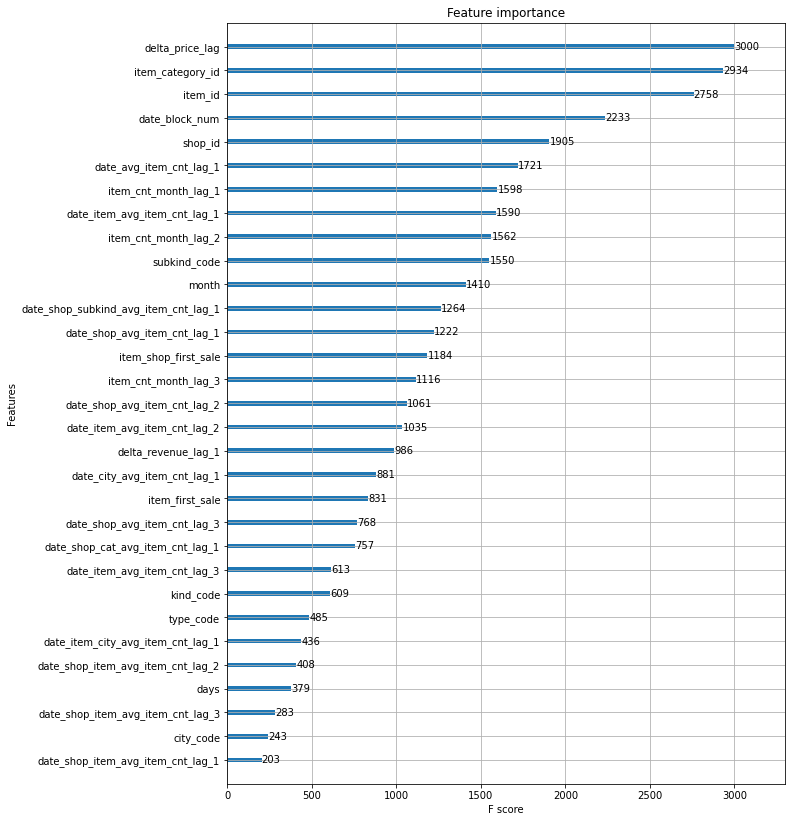

In [89]:
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,14))